In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.optimize import broyden1

In [2]:
A11 = np.array([[0.5, 0.6], [0.2, 0.1]])
A12 = np.array([[0.5, 0.1]]).T
A21 = np.array([[0.2, 0.4]])
A22 = np.array([0.2])

B1 = np.array([[0.3, 0.6], [0.2, 0.1]])
B2 = np.array([[0.3, 0.2]]).T

x1_0 = np.array([[6000, 2500]]).T

def c1(t):
    return np.array([900, 400]) * np.exp(0.005*t)
    
c2 = 200

In [3]:
A22_neg_inv = np.linalg.inv(np.eye(1) - A22)
A1 = A11 + np.dot(np.dot(A12, A22_neg_inv), A21)
B = B1 + np.dot(np.dot(B2, A22_neg_inv), A21)

def c(t):
    return c1(t) - np.dot(A22_neg_inv.T, A12.T).reshape(A12.shape[0]) * c2

In [4]:
B_inv = np.linalg.inv(B)
A1_neg_inv = np.linalg.inv(np.eye(A1.shape[0]) - A1)

def x_der(t, x):
    return np.dot(B_inv, x) - np.dot(np.dot(B_inv, A1), x) - np.dot(B_inv, c(t))

def x_der_change_params(x, t = 0):
    return np.dot(B_inv, x) - np.dot(np.dot(B_inv, A1), x) - np.dot(B_inv, c(t))

In [5]:
t = np.linspace(1, 10, 100)
x1 = solve_ivp(x_der, [1, 10], np.array([6000, 2500]), t_eval=t).y
x2 = np.dot(A22_neg_inv, (np.dot(A21, x1) - c2))

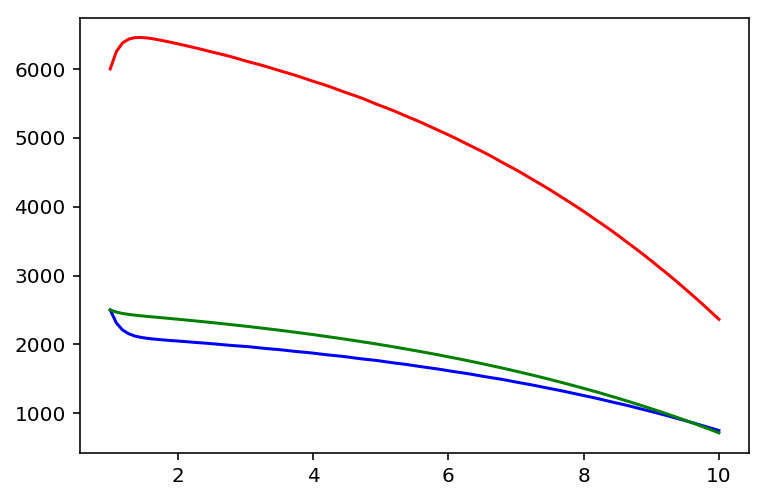

In [6]:
plt.plot(t, x1[0], 'r', t, x1[1], 'b', t, x2[0], 'g')
plt.show()

In [7]:
y1_0 = np.dot((np.eye(A1.shape[0]) - A1), x1_0)
y1_0

array([[ 125.],
       [ 775.]])

In [9]:
def y_der(t, y):
    return np.dot(np.dot(np.eye(A1.shape[0]) - A1, B_inv), y) 

In [10]:
y1 = solve_ivp(y_der, [1, 10], [6000, 2500], t_eval=t).y

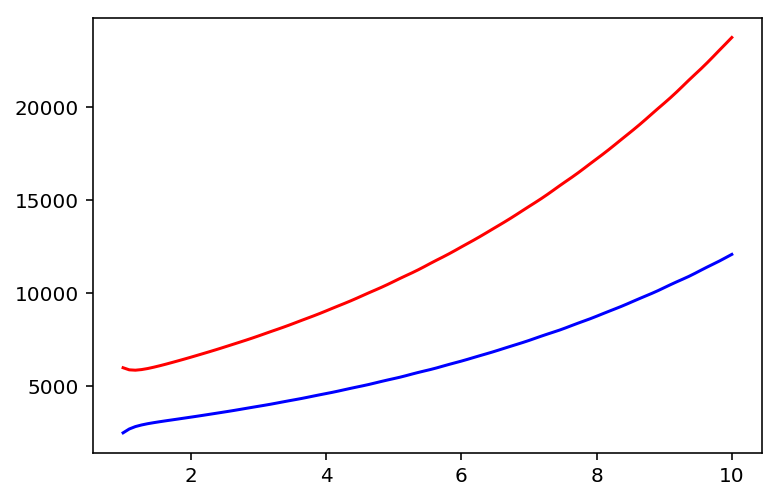

In [11]:
plt.plot(t, y1[0], 'r', t, y1[1], 'b')
plt.show()

In [12]:
eigen_values, vector = np.linalg.eig(np.dot(A1_neg_inv, B))
tech_growth = 1.0 / np.max(eigen_values)
print(tech_growth)

TIME_RANGE = 10

X1_tech_growth = [[6000, 2500]]
st = 1e-3
eps = 1e-3

while st < TIME_RANGE + 2.0:
    new_X1 = np.dot(X1_tech_growth[0], np.exp(tech_growth * st))
    X1_tech_growth.append(new_X1)
    st += eps

0.160764407231


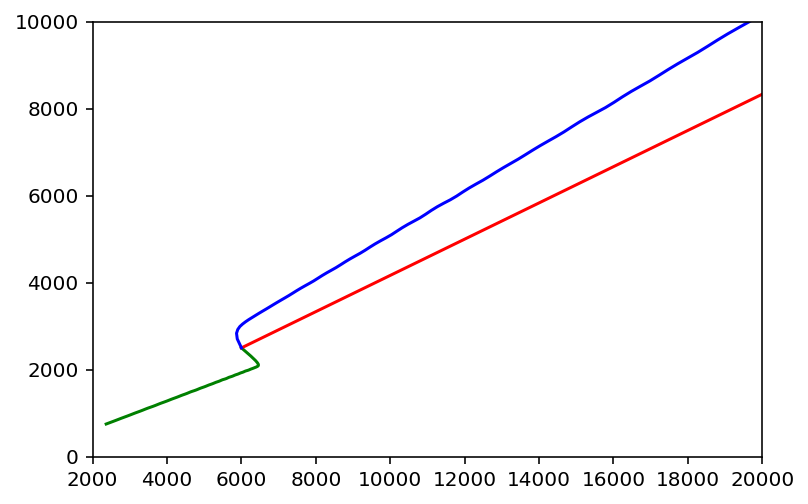

In [13]:
plt.plot(x1[0], x1[1], 'g',
        [x1_tg[0] for x1_tg in X1_tech_growth], [x1_tg[1] for x1_tg in X1_tech_growth], 'r',
        y1[0], y1[1], 'b')
plt.axis([2000, 20000, 0, 10000])
plt.show()